In [ ]:
#KO H05
#pääkomponenttianalyysi ja kohdunkaulansyöpä

In [2]:
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00537/sobar-72.csv'
df = pd.read_csv(url)

df

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
0,10,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8,1
1,10,11,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4,1
2,10,15,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15,1
3,10,11,10,10,15,7,7,1,5,4,2,15,13,7,4,4,4,4,4,1
4,8,11,7,8,10,7,8,1,5,3,2,15,5,3,6,12,5,4,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,10,14,14,10,15,6,7,5,15,14,10,15,13,9,8,12,12,11,9,0
68,10,12,15,10,15,8,8,5,15,14,8,12,14,11,7,13,15,11,14,0
69,10,8,11,6,10,6,4,3,13,9,8,14,12,9,7,11,12,10,10,0
70,9,12,13,10,13,6,6,5,14,13,10,13,12,11,8,12,11,13,15,0


In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#eriytetään luokkamuuttuja
X = df.drop(columns='ca_cervix')
y = df['ca_cervix']

#normalisointi on nyt tosi tärkeää
#koska PCA on pohjimmiltaan varianssin optimointiongelma
#ja suurimmat lukuarvot dominoisivat koko hommaa
sts = StandardScaler().fit(X)
X_norm = pd.DataFrame(sts.transform(X))

#kaikkiaan komponentteja on 20
#tehtävän jatkossa tarvitaan vain 3 pääkomponenttia
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_norm)

#seuraavassa vaiheessa tehtäviä kuvaajia varten 
#tehdään kiva dataframe pääkomponenteista
#sekä sairastumisen luokasta
pca_df = pd.DataFrame(data=X_pca, columns = ['PC 1', 'PC 2','PC 3'])
pca_df['cancer'] = y

print(f'Explained variance: {pca.explained_variance_ratio_}')
#nähdään että 3 pääkomponenttia selittävät 56% datan varianssista

Explained variance: [0.28708527 0.18606619 0.08846312]


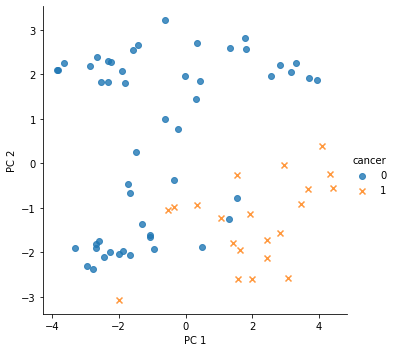

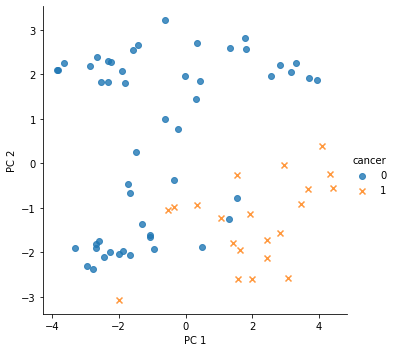

In [81]:
import seaborn as sns

#lisätään muotoiluvaatimukset
#voisi kyllä keksiä jonkun elegantimman tavan
df_tmp = pd.DataFrame([[1,'orange'],[0,'blue']], columns=['cancer','color'])
plot_df = pd.merge(pca_df, df_tmp)

#kuvaaja tällä kertaa linear model plotilla
ax = sns.lmplot(x='PC 1', y='PC 2', data=plot_df, hue='cancer', markers=['o', 'x'], fit_reg=False)

ax.figure

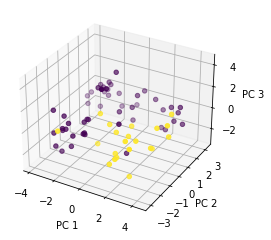

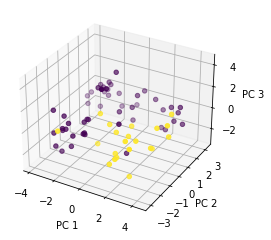

In [80]:
#3D-kuvaaja
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(plot_df['PC 1'], plot_df['PC 2'], plot_df['PC 3'], c = plot_df['cancer'])

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

ax.figure